In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (12,12)

In [2]:
filename = 'P:/CoxaAI/preprocess_data/csv_detection_info/sortering 2/EE.csv'
filename_clean = 'P:/CoxaAI/preprocess_data/csv_detection_info_clean/sortering 2/EE.csv'
saved_cropped_image = 'P:/CoxaAI/preprocess_data/cropped/sortering 2/EE'

In [3]:
detection_df = pd.read_csv(filename)

In [4]:
detection_df

base_path  \
0    P:/CoxaAI/Sortering 2/EE   
1    P:/CoxaAI/Sortering 2/EE   
2    P:/CoxaAI/Sortering 2/EE   
3    P:/CoxaAI/Sortering 2/EE   
4    P:/CoxaAI/Sortering 2/EE   
..                        ...   
187  P:/CoxaAI/Sortering 2/EE   
188  P:/CoxaAI/Sortering 2/EE   
189  P:/CoxaAI/Sortering 2/EE   
190  P:/CoxaAI/Sortering 2/EE   
191  P:/CoxaAI/Sortering 2/EE   

                                              filename parent_name  \
0    1.2.276.0.95.31951.1.20220225.150024.0.2.5993.dcm  1-22006950   
1    1.2.276.0.95.31951.1.20220225.150024.0.2.5993.dcm  1-22006950   
2    1.2.276.0.95.31951.1.20220225.150636.0.2.6006.dcm  1-22006950   
3    1.2.276.0.95.31951.1.20220225.150636.0.2.6006.dcm  1-22006950   
4    1.2.840.114387.166504652.24243.18882.46236.174...  1-22013931   
..                                                 ...         ...   
187  1.3.51.0.7.228534887.11863.44353.38201.9157.60...  1-22082076   
188  1.2.276.0.95.32301.1.20220905.153532.0.2.3889.dcm  1-22086903   
189  1.2.276.0.95.32301.1.20220905.153532.0.2.3889.dcm  1-22086903   
190  1.3.51.0.7.266165270.56921.32075.43817.46113.4...  1-22088230   
191  1.3.51.0.7.266165270.56921.32075.43817.46113.4...  1-22088230   

                                             crop_name  ax0_min  ax0_max  \
0    1.2.276.0.95.31951.1.20220225.150024.0.2.5993....     1357     1502   
1    1.2.276.0.95.31951.1.20220225.150024.0.2.5993....     1376     1521   
2    1.2.276.0.95.31951.1.20220225.150636.0.2.6006....     1413     1560   
3    1.2.276.0.95.31951.1.20220225.150636.0.2.6006....     1393     1544   
4    1.2.840.114387.166504652.24243.18882.46236.174...      903     1064   
..                                                 ...      ...      ...   
187  1.3.51.0.7.228534887.11863.44353.38201.9157.60...     1118     1299   
188  1.2.276.0.95.32301.1.20220905.153532.0.2.3889....      658      791   
189  1.2.276.0.95.32301.1.20220905.153532.0.2.3889....      649      778   
190  1.3.51.0.7.266165270.56921.32075.43817.46113.4...     1510     1669   
191  1.3.51.0.7.266165270.56921.32075.43817.46113.4...     1505     1666   

     ax1_min  ax1_max  confidence  is_rotated  diagnosis diagnosis_raw  
0        628      733    0.984098       False          4            EE  
1       1185     1290    0.966559       False          4            EE  
2       1193     1299    0.983000       False          4            EE  
3        643      752    0.982760       False          4            EE  
4       1219     1341    0.902507       False          4            EE  
..       ...      ...         ...         ...        ...           ...  
187     1613     1745    0.923031       False          4            EE  
188      512      609    0.939393       False          4            EE  
189     1035     1130    0.723501       False          4            EE  
190     1135     1263    0.694248       False          4            EE  
191     2009     2140    0.553631       False          4            EE  

[192 rows x 12 columns]

### [Optional] Sort by confidence (filter out bad prediction)

In [5]:
# detection_df = detection_df[detection_df.confidence > 0.5]

In [6]:
detection_df[detection_df.confidence < 0.5].index

Int64Index([ 12,  13,  19,  28,  29,  32,  52,  57,  58,  60,  61,  62,  77,
             89,  91, 112, 114, 116, 120, 127, 128, 133, 134, 135, 136, 152,
            154, 175],
           dtype='int64')

Note that there many cases that are not good

### Look at the crop images

Are they reasonable, if not, mark the "weird", "wrong detected" image indice before saving it back to the clean folder

In [7]:
# plot every 9 of them

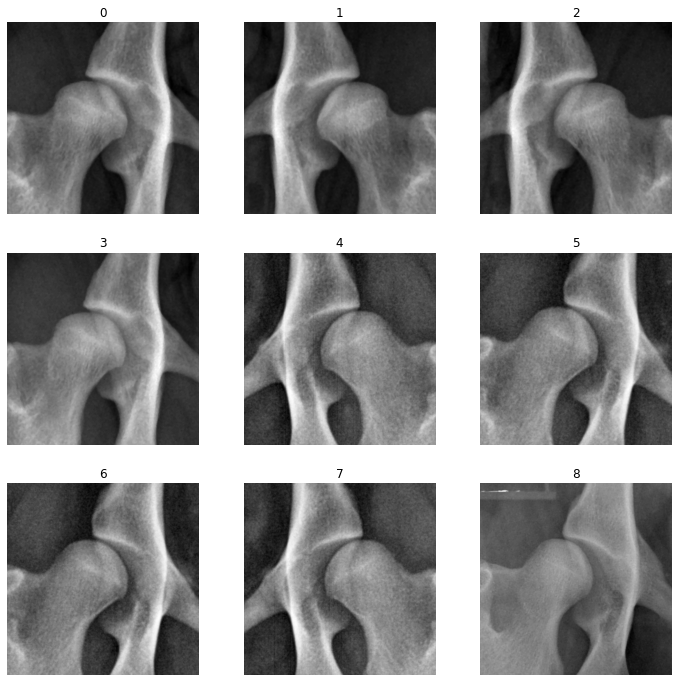

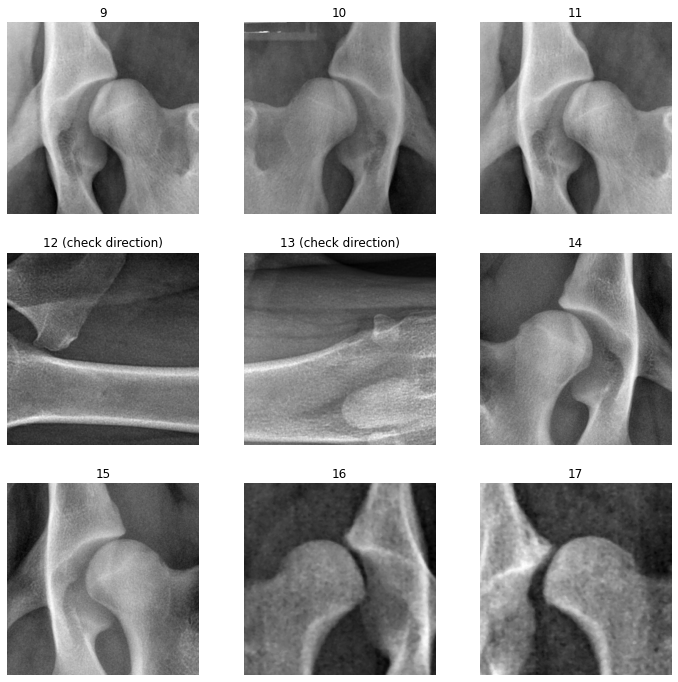

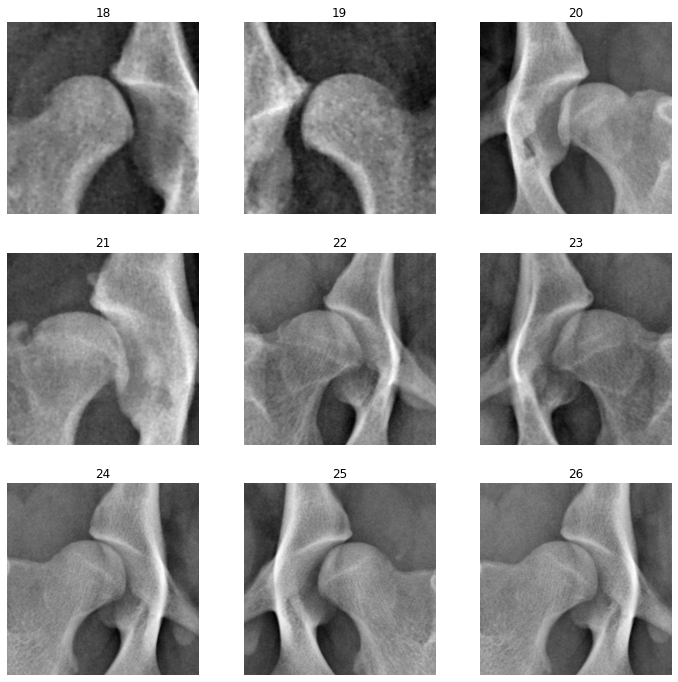

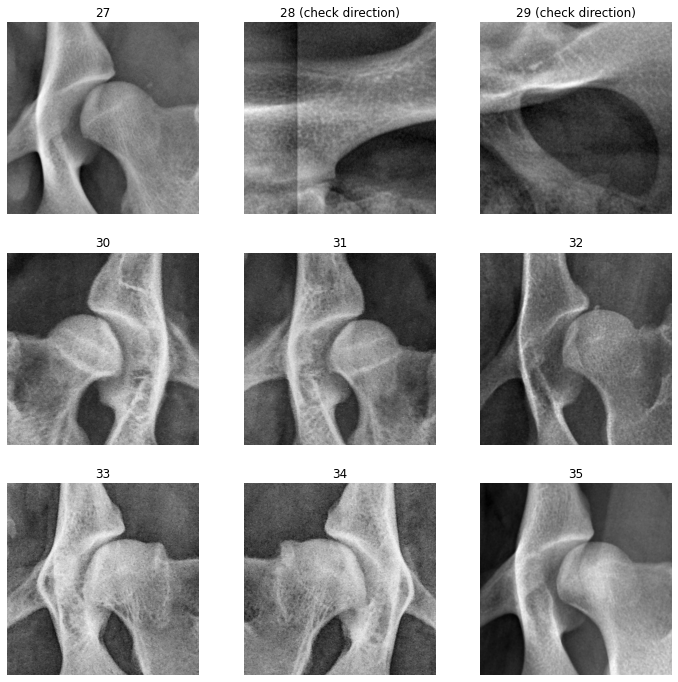

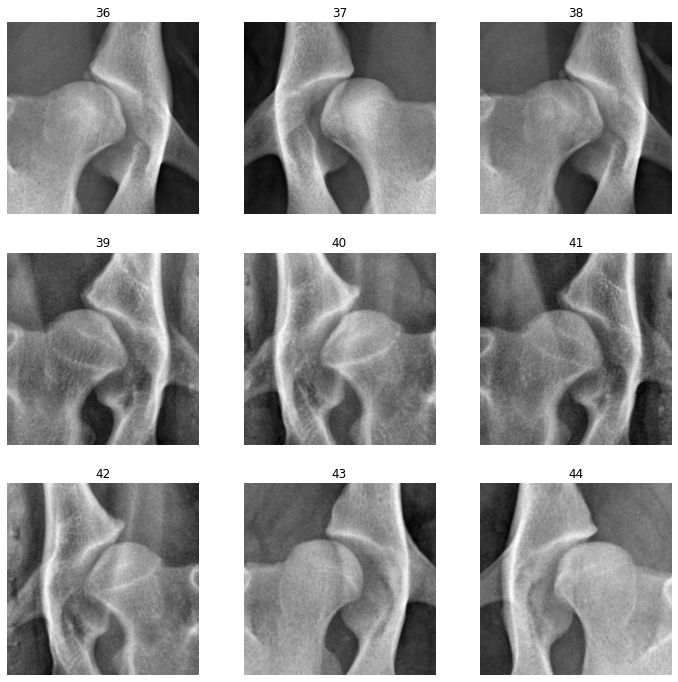

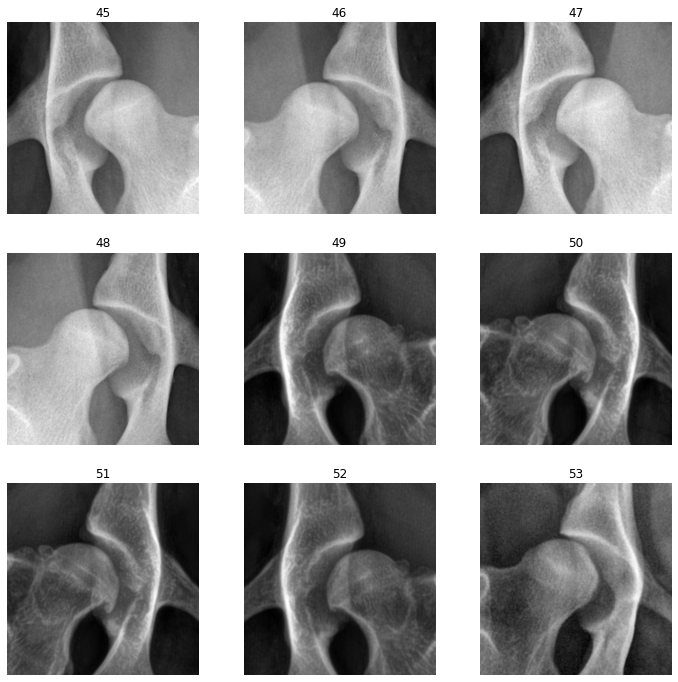

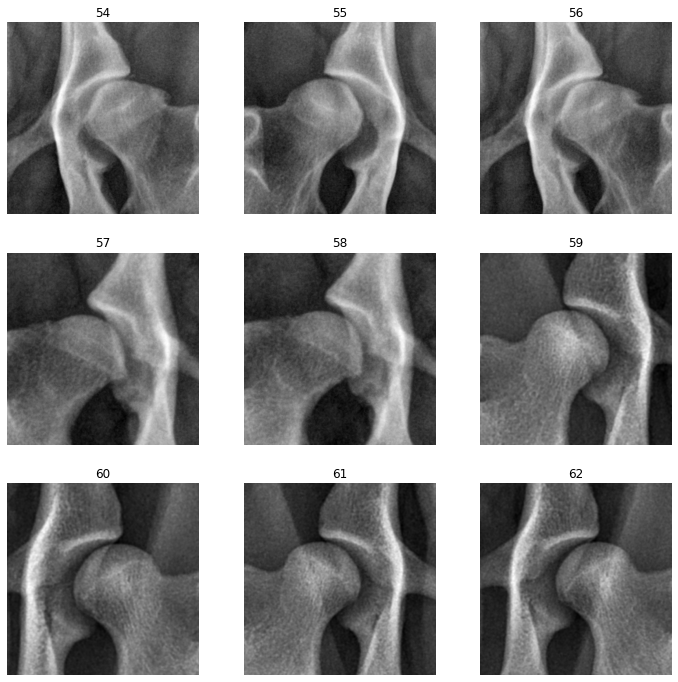

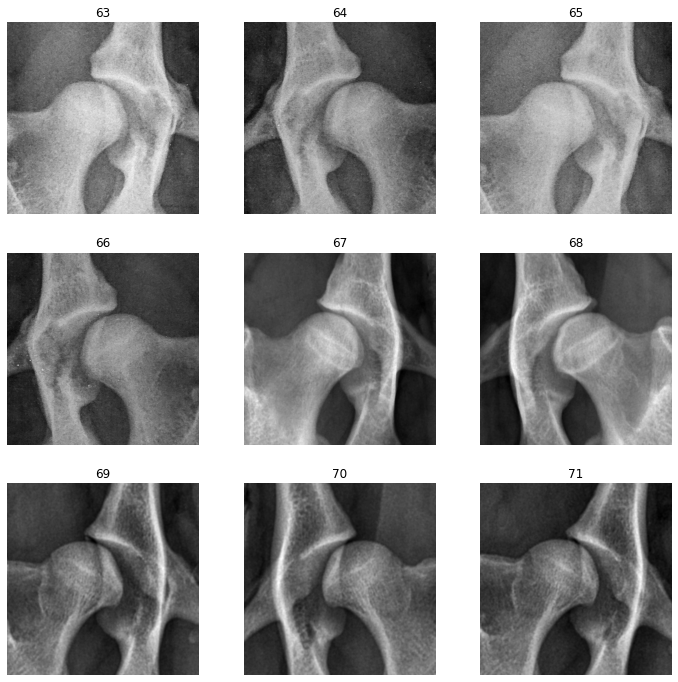

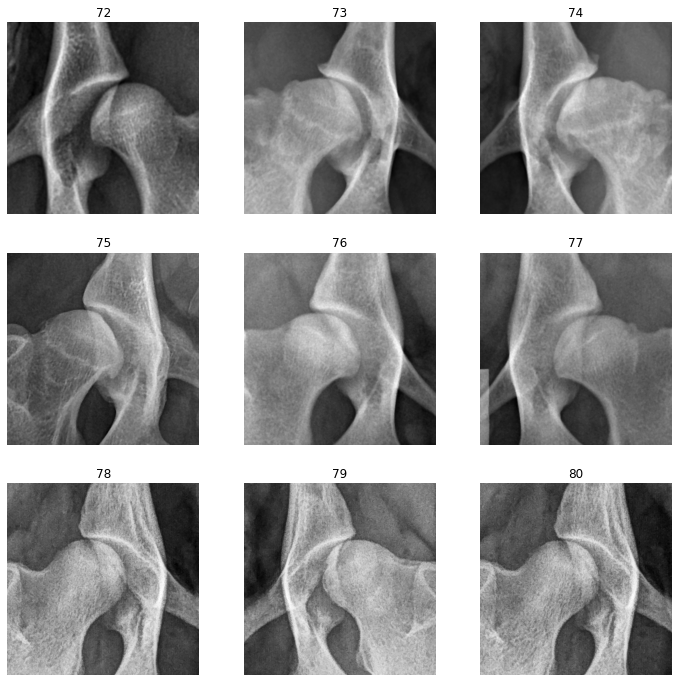

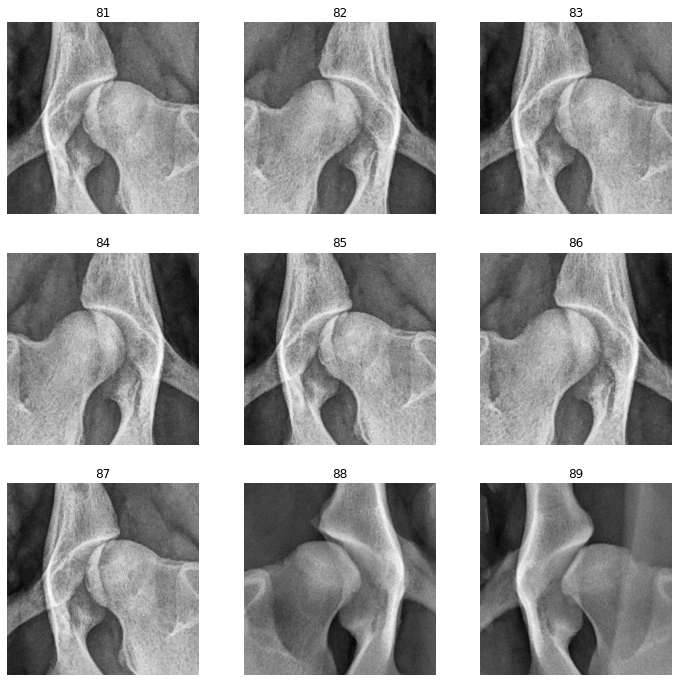

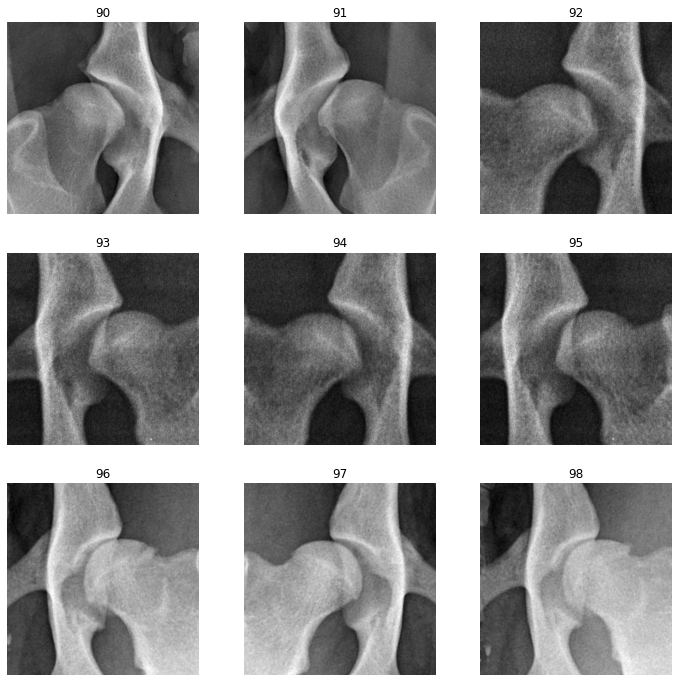

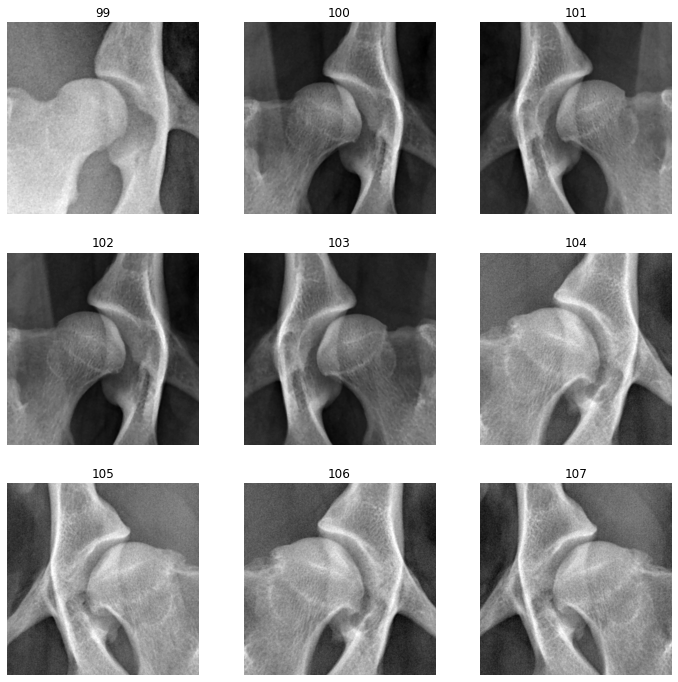

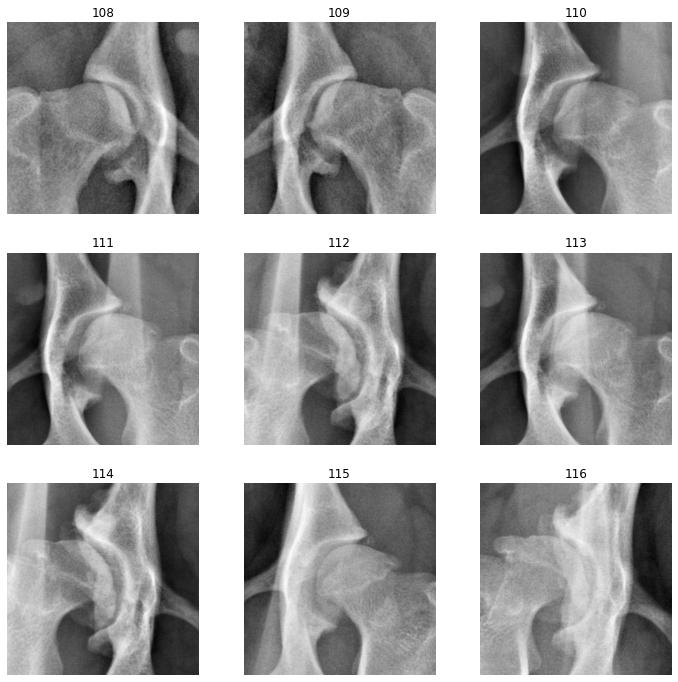

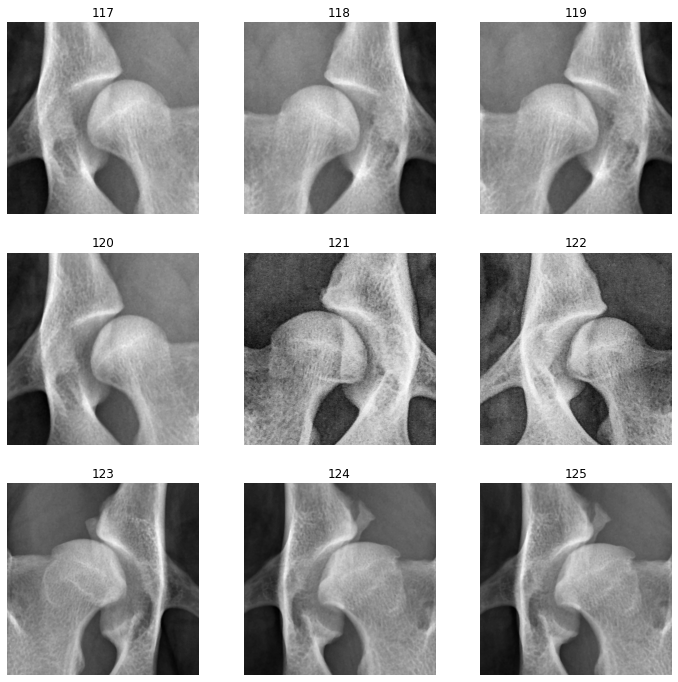

C:\NMBU\TEMP\ipykernel_12372\107391665.py:11: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(img, 'gray')


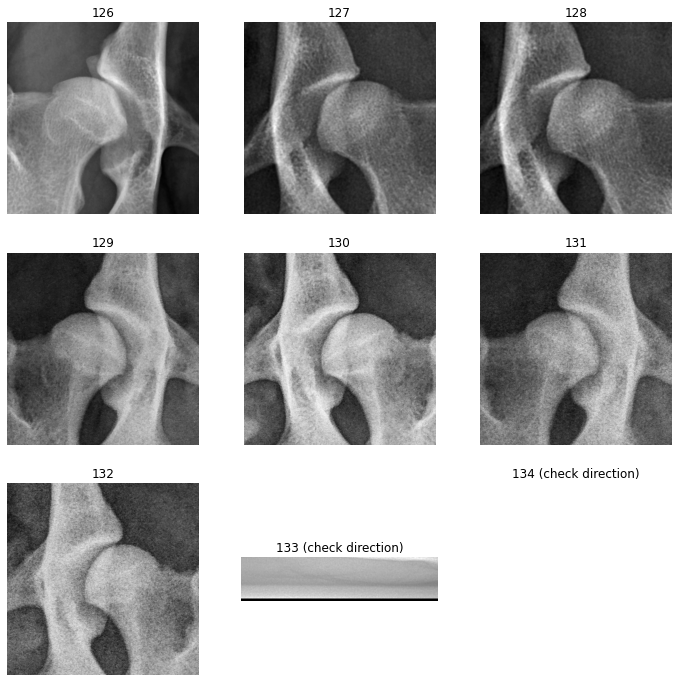

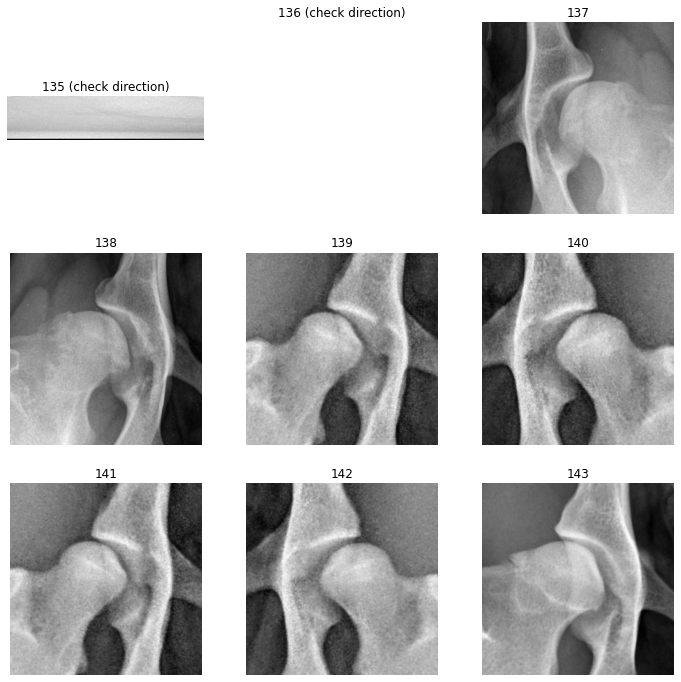

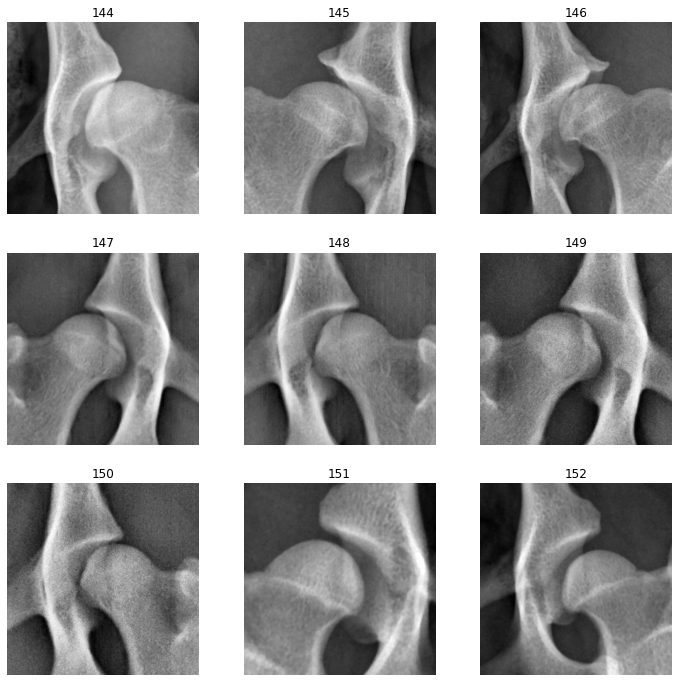

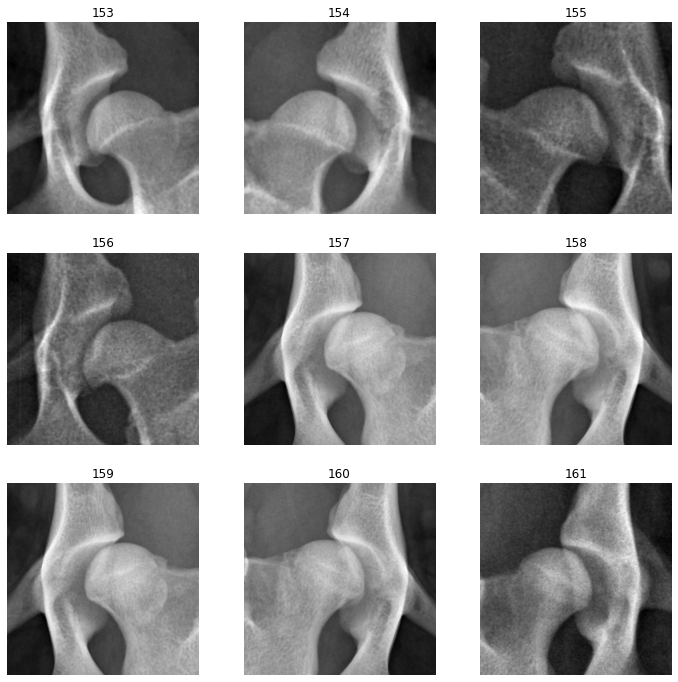

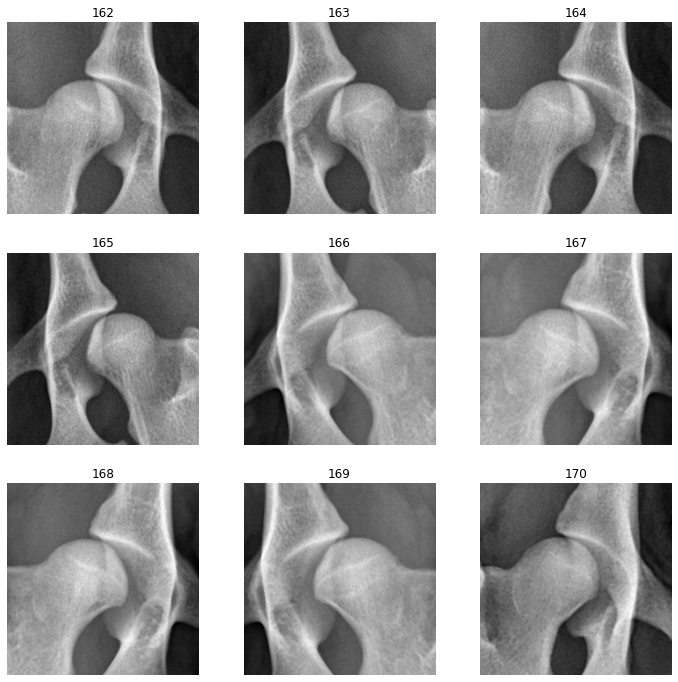

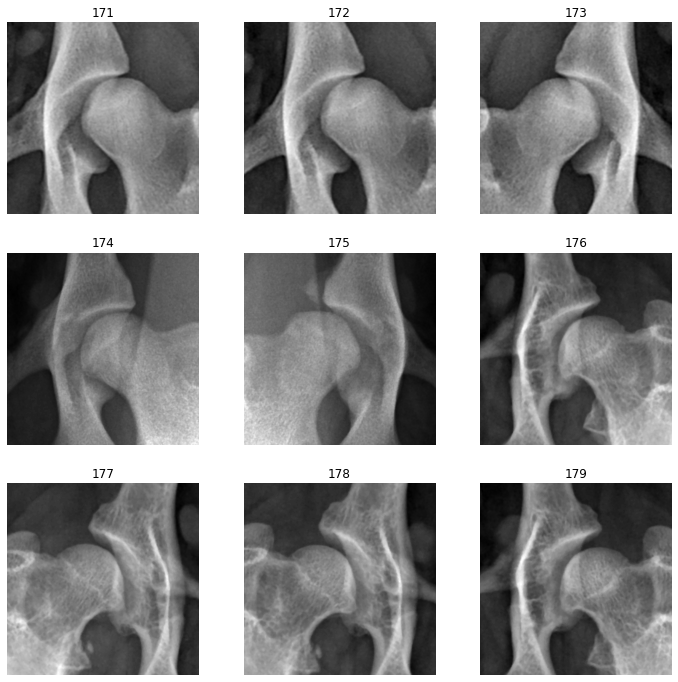

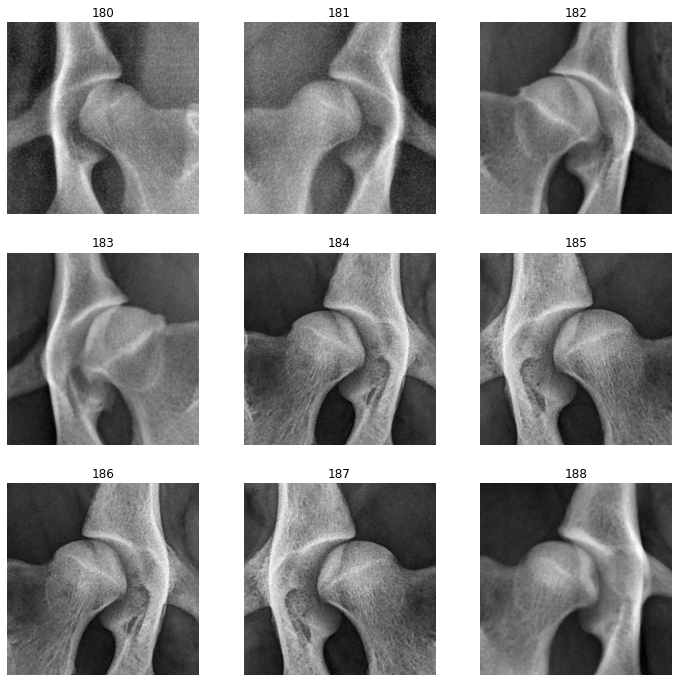

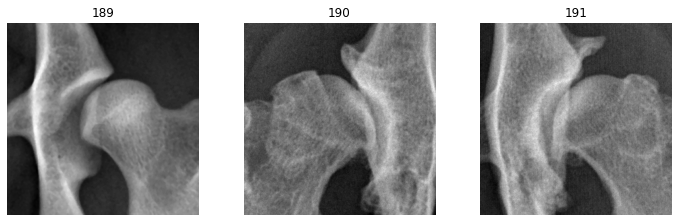

In [8]:
for id, item in detection_df.iterrows():
    fn = item['crop_name']
    img = np.load(os.path.join(saved_cropped_image,fn + '.npy'))
    suffix = ' (check direction)' if item['is_rotated'] else ''
#     parent = item['parent_name']
#     if not pd.isnull(parent):
#         img = np.load(os.path.join(saved_cropped_image, parent,fn + '.npy'))
#     else:
#         img = np.load(os.path.join(saved_cropped_image,fn + '.npy'))
    plt.subplot(3,3, (id%9) + 1)
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.title(str(id)+suffix)

    if (id%9) == 8:
        plt.show()                    
        
plt.show()

## Assign "flipped" column before removing failed predictions

In [9]:
flipped = np.array([False] * detection_df.shape[0])
flipped_indice = []
flipped[detection_df.index.isin(flipped_indice)] = True
detection_df['flipped'] = flipped

## Remove bad detection items

In [10]:
remove_indice = [12, 13, 28, 29, 133, 134, 135, 136]
detection_df[~detection_df.index.isin(remove_indice)]

base_path  \
0    P:/CoxaAI/Sortering 2/EE   
1    P:/CoxaAI/Sortering 2/EE   
2    P:/CoxaAI/Sortering 2/EE   
3    P:/CoxaAI/Sortering 2/EE   
4    P:/CoxaAI/Sortering 2/EE   
..                        ...   
187  P:/CoxaAI/Sortering 2/EE   
188  P:/CoxaAI/Sortering 2/EE   
189  P:/CoxaAI/Sortering 2/EE   
190  P:/CoxaAI/Sortering 2/EE   
191  P:/CoxaAI/Sortering 2/EE   

                                              filename parent_name  \
0    1.2.276.0.95.31951.1.20220225.150024.0.2.5993.dcm  1-22006950   
1    1.2.276.0.95.31951.1.20220225.150024.0.2.5993.dcm  1-22006950   
2    1.2.276.0.95.31951.1.20220225.150636.0.2.6006.dcm  1-22006950   
3    1.2.276.0.95.31951.1.20220225.150636.0.2.6006.dcm  1-22006950   
4    1.2.840.114387.166504652.24243.18882.46236.174...  1-22013931   
..                                                 ...         ...   
187  1.3.51.0.7.228534887.11863.44353.38201.9157.60...  1-22082076   
188  1.2.276.0.95.32301.1.20220905.153532.0.2.3889.dcm  1-22086903   
189  1.2.276.0.95.32301.1.20220905.153532.0.2.3889.dcm  1-22086903   
190  1.3.51.0.7.266165270.56921.32075.43817.46113.4...  1-22088230   
191  1.3.51.0.7.266165270.56921.32075.43817.46113.4...  1-22088230   

                                             crop_name  ax0_min  ax0_max  \
0    1.2.276.0.95.31951.1.20220225.150024.0.2.5993....     1357     1502   
1    1.2.276.0.95.31951.1.20220225.150024.0.2.5993....     1376     1521   
2    1.2.276.0.95.31951.1.20220225.150636.0.2.6006....     1413     1560   
3    1.2.276.0.95.31951.1.20220225.150636.0.2.6006....     1393     1544   
4    1.2.840.114387.166504652.24243.18882.46236.174...      903     1064   
..                                                 ...      ...      ...   
187  1.3.51.0.7.228534887.11863.44353.38201.9157.60...     1118     1299   
188  1.2.276.0.95.32301.1.20220905.153532.0.2.3889....      658      791   
189  1.2.276.0.95.32301.1.20220905.153532.0.2.3889....      649      778   
190  1.3.51.0.7.266165270.56921.32075.43817.46113.4...     1510     1669   
191  1.3.51.0.7.266165270.56921.32075.43817.46113.4...     1505     1666   

     ax1_min  ax1_max  confidence  is_rotated  diagnosis diagnosis_raw  \
0        628      733    0.984098       False          4            EE   
1       1185     1290    0.966559       False          4            EE   
2       1193     1299    0.983000       False          4            EE   
3        643      752    0.982760       False          4            EE   
4       1219     1341    0.902507       False          4            EE   
..       ...      ...         ...         ...        ...           ...   
187     1613     1745    0.923031       False          4            EE   
188      512      609    0.939393       False          4            EE   
189     1035     1130    0.723501       False          4            EE   
190     1135     1263    0.694248       False          4            EE   
191     2009     2140    0.553631       False          4            EE   

     flipped  
0      False  
1      False  
2      False  
3      False  
4      False  
..       ...  
187    False  
188    False  
189    False  
190    False  
191    False  

[184 rows x 13 columns]

In [11]:
new_detection_df = detection_df[~detection_df.index.isin(remove_indice)]

In [12]:
exclude_ids = pd.read_csv('exclude_id.csv').id.values
new_detection_df = new_detection_df[~new_detection_df.parent_name.isin(exclude_ids)]
print(new_detection_df.shape)

(184, 13)


In [13]:
new_detection_df.to_csv(filename_clean, index=False)

In [23]:
detection_df[detection_df.index.isin(remove_indice)]

base_path  \
12   P:/CoxaAI/Sortering 2/EE   
13   P:/CoxaAI/Sortering 2/EE   
28   P:/CoxaAI/Sortering 2/EE   
29   P:/CoxaAI/Sortering 2/EE   
133  P:/CoxaAI/Sortering 2/EE   
134  P:/CoxaAI/Sortering 2/EE   
135  P:/CoxaAI/Sortering 2/EE   
136  P:/CoxaAI/Sortering 2/EE   

                                              filename parent_name  \
12   1.3.6.1.4.1.19179.1.11641741842187116.3.22165....  1-22018856   
13   1.3.6.1.4.1.19179.1.11641741842187116.3.22165....  1-22018856   
28   1.2.840.114387.2938632645.36578.16735.33399.61...  1-22028467   
29   1.2.840.114387.2938632645.36578.16735.33399.61...  1-22028467   
133  1.3.6.1.4.1.19179.1.11641741842187116.3.19011....  1-22060908   
134  1.3.6.1.4.1.19179.1.11641741842187116.3.19011....  1-22060908   
135  1.3.6.1.4.1.19179.1.11641741842187116.3.19413....  1-22060908   
136  1.3.6.1.4.1.19179.1.11641741842187116.3.19413....  1-22060908   

                                             crop_name  ax0_min  ax0_max  \
12   1.3.6.1.4.1.19179.1.11641741842187116.3.22165....     1087     1303   
13   1.3.6.1.4.1.19179.1.11641741842187116.3.22165....     1089     1299   
28   1.2.840.114387.2938632645.36578.16735.33399.61...      994     1135   
29   1.2.840.114387.2938632645.36578.16735.33399.61...     1001     1144   
133  1.3.6.1.4.1.19179.1.11641741842187116.3.19011....     1376     1660   
134  1.3.6.1.4.1.19179.1.11641741842187116.3.19011....     1391     1672   
135  1.3.6.1.4.1.19179.1.11641741842187116.3.19413....     1376     1660   
136  1.3.6.1.4.1.19179.1.11641741842187116.3.19413....     1391     1672   

     ax1_min  ax1_max  confidence  is_rotated  diagnosis diagnosis_raw  \
12      1166     1324         0.0        True          4            EE   
13      1883     2038         0.0        True          4            EE   
28       632      735         0.0        True          4            EE   
29      1162     1266         0.0        True          4            EE   
133     1335     1544         0.0        True          4            EE   
134     2447     2663         0.0        True          4            EE   
135     1335     1544         0.0        True          4            EE   
136     2447     2663         0.0        True          4            EE   

     flipped  
12     False  
13     False  
28     False  
29     False  
133    False  
134    False  
135    False  
136    False